# More image processing with ```OpenCV```

In [2]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
import pandas as pd
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
from utils.hist import col_hist_func
import matplotlib.pyplot as plt

We're going to start by seeing more ways that we can manipulate images using ```OpenCV```.

In [3]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

__Rotation__

To rotate about a point, we first need to define that point and then use the function ```cv2.getRotationMatrix2D```.

This function takes the following arguments:

```cv2.getRotationMatrix2D((x_point, y_point), degrees, scale)``` 

x and y point here: is a point in which we wanna rotate around :)))

In [4]:
M = cv2.getRotationMatrix2D((width/2, height/2), -45, 2) #width/2 = xpoint, height/2 = point, 45 degrees and no scaling 
#negative rotation er clockwise (-45 degrees)
#positive rotation er not clockwise (45 degrees)
#scale er vitterligt ZOOM IND OG UD

In [5]:
M

array([[   1.41421356,   -1.41421356,   88.7329727 ],
       [   1.41421356,    1.41421356, -294.70771953]])

In [6]:
rotated = cv2.warpAffine(image, M, (width, height))

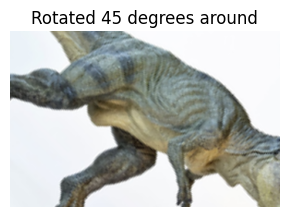

In [7]:
jimshow(rotated, "Rotated 45 degrees around")

__Translation__

In [8]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

To *translate* an image, there is no specific built-in function with ```OpenCV``` to define a translation matrix. 

Instead, we need to define then translation matrix we want to use.

We can do that using ```numpy```.

In [9]:
# play around with it
M = np.float64([[1, 0, 25], #25 pixels along the x axis
                [0, 1, 50]]) # 50 pixels along the y a
# green bracket is the array it self
# red bracket is the vector inside the array
#blue paranthesis is for the function np.float64()




#M = np.float64([[1, 0, 1], #25 pixels along the x axis
                #[0, 1, 0]]) # 50 pixels along the y a

We can then use the ```cv2.warpAffine()``` function to translate our image.

There's some tricky maths involved here - for the mathematically inclined, you can read more [here](https://people.computing.clemson.edu/~dhouse/courses/401/notes/affines-matrices.pdf)

But the crucial point is that we're essentially multiplying together the original image by the translation matrix ```M``` that we've just defined, which results in a modified image being created.

In [10]:
shifted = cv2.warpAffine(image, M, (width, height))

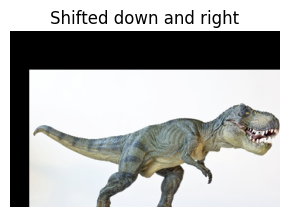

In [11]:
jimshow(shifted, "Shifted down and right")

## Drawing

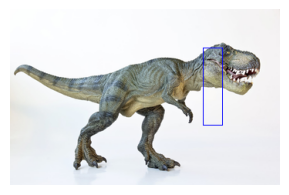

In [12]:
# cv2.rectangle(image, start_point, end_point, thickness)
#start points: upper left corner
#end points: lower right corner (with these 2 points we can define a rectangle)
# think of Ross drawing of a cat 
cv2.rectangle(image, (250, 50), (275, 150), (255,0, 0), 1)
#cv2.rectangle(image, (50, 200) startpoint 50x-axis and 200y-axis, (200, 225) endpoint 200x-axis and 255y-axis, (0,255,0) GREEN, 1)
jimshow(image)

__Draw circle__

In [13]:
(centerX, centerY) = (image.shape[1] // 2, image.shape[0] // 2) ## double // is integer division (the whole integer )

In [14]:
11/2  ## float division = we get float 

5.5

In [15]:
11//2 # Integer division = gives an integer 

5

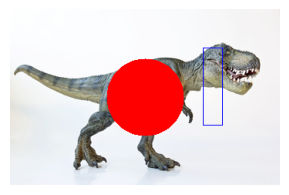

In [16]:
# cv2.circl(image, cent_coords, radio, colour, thickness)
cv2.circle(image, (centerX, centerY), 50, (0,0,255), -1) # minus thickness (fills it ouTTTT)
jimshow(image)

**NOTE:** Drawing on images is *destructive*! It modifies the image in place and can't easily be removed. 

If you draw on an image and then decide you want the original image without the drawings on it, you'll need to load the image again.

In [17]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

In [18]:
image.shape

(228, 350, 3)

## Using masks

We can see how bitwise operations work by just starting out with a simple rectangle and circle of white pixels on black backgrounds.

In [19]:
# Create a heightxwidth array of zeros
zeros = np.zeros((height, width), dtype = "uint8")

**Question:** What does the following cell do? Can you explain it natural language?

In [20]:
rect = cv2.rectangle(zeros, (25, 25), (275, 275), 255, -1)

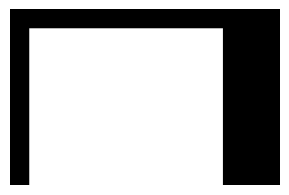

In [21]:
jimshow_channel(rect)

__Circle__

We can get a circular mask in much the same way, this time using ```cv2.circle()```.


In [22]:
# circle
zeros = np.zeros((300, 300), dtype = "uint8")

**Question:** Again, can you explain what this is doing? 

In [23]:
circ = cv2.circle(zeros, (150, 150), 150, 255, -1) 
#circ = cv2.circle(zeros, (150, 150) STARTPOINT, 150 RADIUS, 255 COLOUR, -1 FILLING!!!!!) 

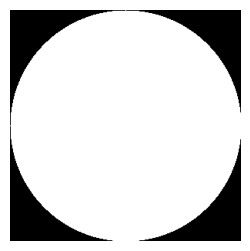

In [24]:
jimshow_channel(circ)

__Rectangle mask__

In [25]:
# Mask should be same shape as image
mask = np.zeros(image.shape[:2], dtype="uint8") #image.shape[:2] height and width

**Question:** What is this cell doing?

In [26]:
mask = cv2.rectangle(mask, (100,100), (200, 200), 255, -1)

**Question:** What do you expect to see here?

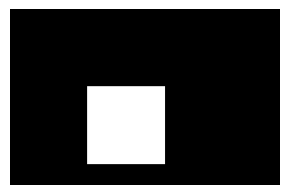

In [27]:
jimshow_channel(mask)

**Question:** And what do you expect to see here?

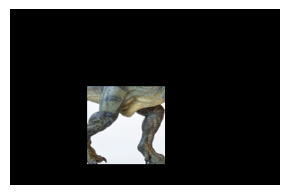

In [28]:
jimshow(cv2.bitwise_and(image, image, mask=mask)) #takes the image argument twice (image1: source, image 2: destination) its a bit wierd

__Circular mask__

**Question:** What do you think this does and what do you expect to see after running the next two cells?

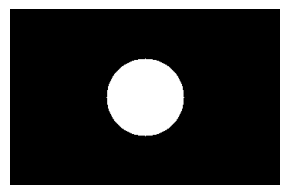

In [29]:
# create mask 'image'
mask = np.zeros(image.shape[:2], dtype = "uint8")
(centre_x, centre_y) = (image.shape[1]//2, image.shape[0]//2)
jimshow_channel(cv2.circle(mask, (centre_x, centre_y), 50, 255, -1))

We are mainly gonna use bitwise operations with AND :))

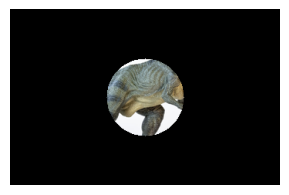

In [30]:
#jimshow(cv2.bitwise_or(image, image, mask=mask)) ### or
jimshow(cv2.bitwise_and(image, image, mask=mask)) ### and
#jimshow(cv2.bitwise_xor(image, image, mask=mask)) ### xor
#jimshow(cv2.bitwise_not(image, image, mask=mask)) #### NOT

__Load image__

In [31]:
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

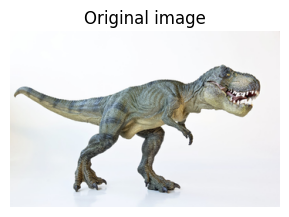

In [32]:
jimshow(image, "Original image")

## Exercise

We've now seen how to load images and split them into their separate colour channels. We've also seen how we can use this to extract colour histograms showing distributions of pixel intensities across each channel. Lastly we've seen how we can use this to plot colour histograms for any given image.

- In your groups, rework the code in the cell above into a function which can create a colour histogram for any given image based on its filename. ie. the function should hold:
- load an image
- extract histogram across three channels
- plots the results to screen
- save visualization



OKAY, so I've made a function in utils folder called ```hist```, which i'm calling in the beginning of this file. 
Then I can call it here by ```col_hist_func``` you enter the filename of image and it runs and saves :)) :)

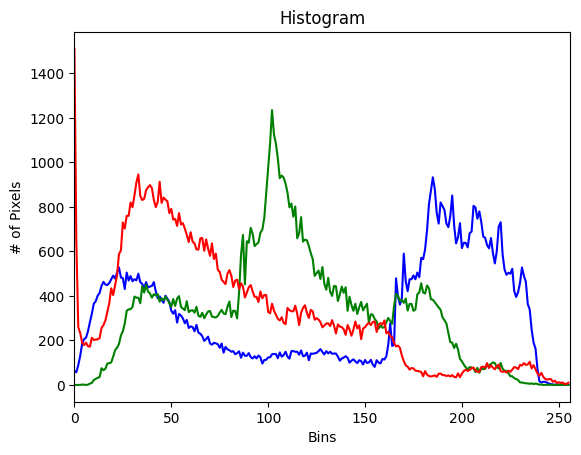

In [33]:
#my function 
col_hist_func("beach.png")


## Comparing histograms

We also saw briefly last week in class that we are able to compare images based on their colour histograms. This is something that can be done mathematically in ```OpenCV```. 

Let's load a different image.

In [34]:
image2 = cv2.imread(os.path.join("..", "data", "img", "t-rex2.png"))

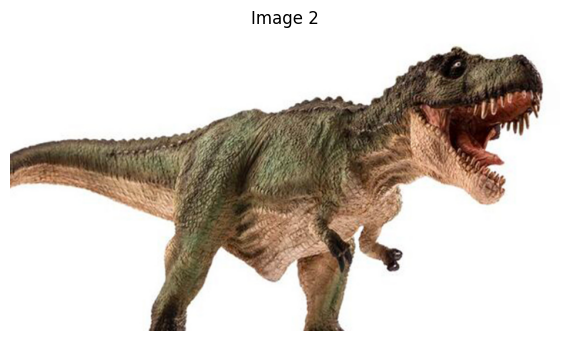

In [35]:
jimshow(image2, "Image 2")

## Comparing histograms

__Extract histograms__

Last week we saw how to extract histograms from images using ```cv2.calcHist()```, specifically for single channels.

In the lines below, we're ```cv2.calcHist()``` to extract histograms across all three channels.

In [36]:
hist1 = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
#cv syntac you can print all 3 col individually by using 3 arguments at the same time; hence the brackets

In [37]:
hist2 = cv2.calcHist([image2], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

__MinMax normalization__

Before comparing histograms, we first have to *normalise* them to occur within a narrower ranger of values. 

**Question:** Why do think we need to do this?

We're doing to use MinMax normalisation, which we calculate in the following way for each value:

```norm_pixel = (value-min) / (max-min)```

That is to say for every pixel ```value``` we subtract the ```min``` pixel value in the image, then divide that by the ```max``` minus the ```min```. 

In [38]:
hist1 = cv2.normalize(hist1, hist1, 0, 1.0, cv2.NORM_MINMAX) #normalizing from 0 - 1.0
hist2 = cv2.normalize(hist2, hist2, 0, 1.0, cv2.NORM_MINMAX) #normalizing from 0 - 1.0

__Comparing the first two histograms__

We're going to compare images computing the *Chi-Squared distance*, but there are a range of options available via OpenCV. 

You can read more [here](https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/).

In [39]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)
# This value is only intrepretable when compared to another score

33.77

__Load a new image__

In [40]:
image3 = cv2.imread(os.path.join("..", "data", "img", "wave.png"))

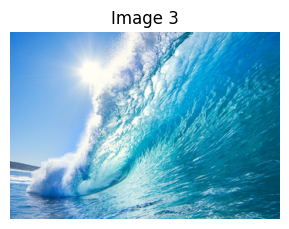

In [41]:
jimshow(image3, "Image 3")

__Compare with image 1__

In [42]:
hist3 = cv2.calcHist([image3], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
hist3 = cv2.normalize(hist3, hist3, 0, 1.0, cv2.NORM_MINMAX)

We can then show calculate the scores between image and the other images

In [43]:
round(cv2.compareHist(hist1, hist1, cv2.HISTCMP_CHISQR), 2)
#comparing dino1 and dino1 --> short colour distance = equal

0.0

In [44]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)
#comparing dino1 and dino2 --> maaah not alike but not the same 

33.77

In [45]:
round(cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR), 2)
#comparing wave and dino1 --> longer colour distance == more different

100.04

In [46]:
round(cv2.compareHist(hist2, hist3, cv2.HISTCMP_CHISQR), 2)
# whaaaaat wave compared to dino2 --> shit mand!!!!!!!!

26952.57

## Exercise

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be *Assignment 1* for Visual Analytics, designing a simple *image search* algorithm. The Github classroom repo for this Assignment will go online later.

### Function for exercise

In [173]:
# Function

def compare_top5_hist(filename):
    # set data path
    path = os.path.join("..", "..", "..", "431824", "flowers", filename)

    # Loading the file you want to compare to the rest
    image = cv2.imread(path)

    # Calculate histogram for that file
    image_hist = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

    # Normalize the histogram from 0 - 1.0 for that file
    image_hist_norm = cv2.normalize(image_hist, image_hist, 0, 1.0, cv2.NORM_MINMAX) #normalizing from 0 - 1.0

    ######## Loop ########
    
    # Create an empty dataframe
    df = pd.DataFrame(columns = ["image", "compare_score"])

    # Create a new path
    new_path = os.path.join("..", "..", "..", "431824", "flowers")

    # Looping over all images in flowers-folder
    for i in os.listdir(new_path):
        flower_images = cv2.imread(os.path.join(new_path, i)) # read the images

        # Make histograms
        all_hist = cv2.calcHist([flower_images], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

        # Normalize histograms
        all_hist_normalized = cv2.normalize(all_hist, all_hist, 0, 1.0, cv2.NORM_MINMAX)

        # Calculate compare scores for file and all other images in folder
        compare_scores =round(cv2.compareHist(image_hist_norm, all_hist_normalized, cv2.HISTCMP_CHISQR), 2)
        
        # Append data to previously created dataframe
        df = df.append({"image": i,"compare_score":compare_scores}, ignore_index=True) 
    
    # Remove the row where the compare score = 0, i.e., identical image (filename compared to it self)
    df.drop(df[df['compare_score'] == 0].index, inplace = True) 

    # Make a top 5
    df=df.nsmallest(5, 'compare_score')

    # Sort ascending 
    return(df.sort_values('compare_score'))
  




In [180]:
#run function
compare_top5_hist("image_0021.jpg")

/tmp/ipykernel_688/1727767172.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"image": i,"compare_score":compare_scores}, ignore_index=True)
/tmp/ipykernel_688/1727767172.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"image": i,"compare_score":compare_scores}, ignore_index=True)
/tmp/ipykernel_688/1727767172.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"image": i,"compare_score":compare_scores}, ignore_index=True)
/tmp/ipykernel_688/1727767172.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"image": i,"compare_score":compare_scores}, ignore_index=Tr

,image,compare_score
1057,image_0949.jpg,81.96
304,image_0798.jpg,82.57
134,image_0022.jpg,82.65
512,image_0742.jpg,82.91
94,image_0910.jpg,83.16


### Comparing the top 5 qualitatively

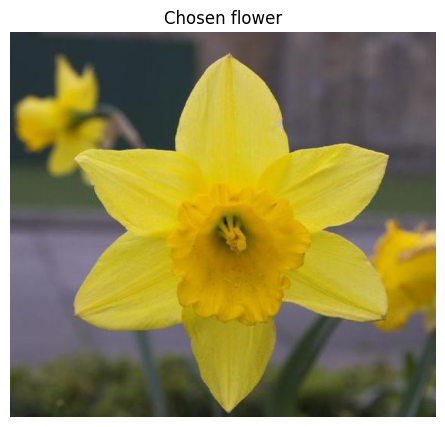

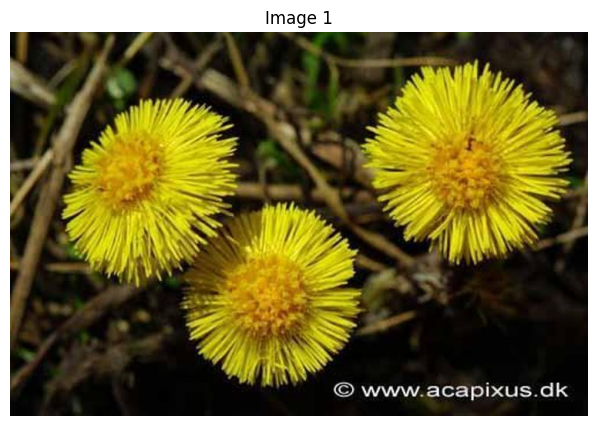

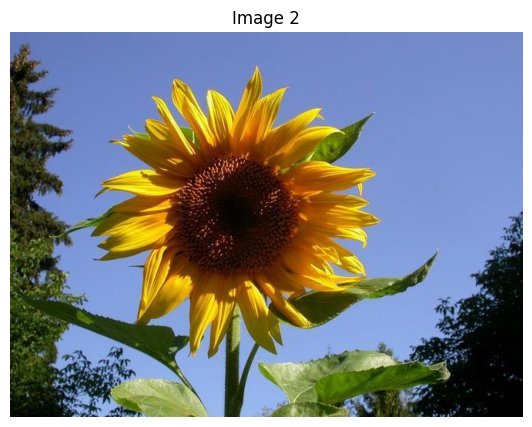

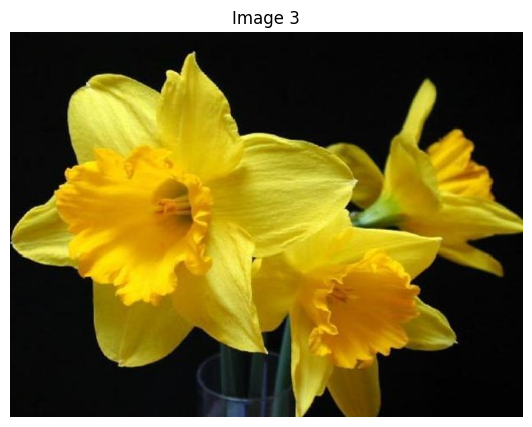

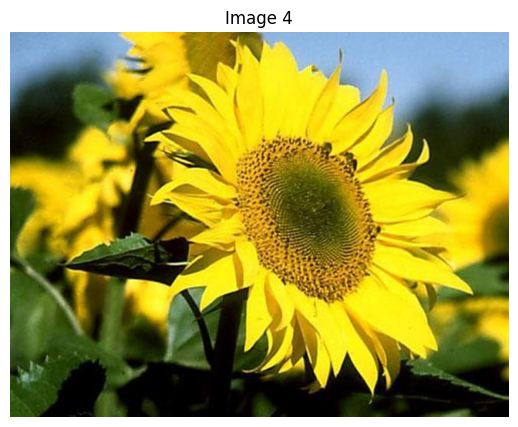

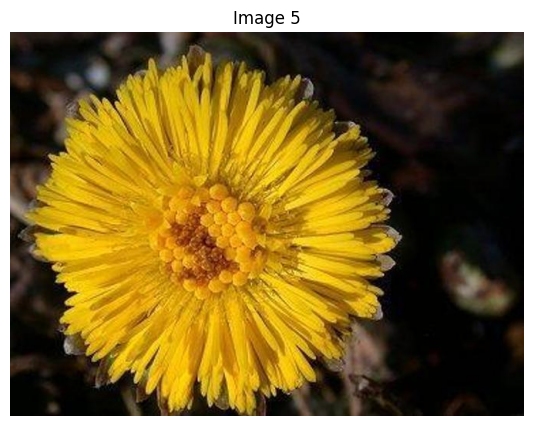

In [179]:
img1 = cv2.imread(os.path.join("..", "..", "..", "431824", "flowers", "image_0949.jpg"))
img2 = cv2.imread(os.path.join("..", "..", "..", "431824", "flowers", "image_0798.jpg"))
img3 =cv2.imread(os.path.join("..", "..", "..", "431824", "flowers", "image_0022.jpg"))
img4 =cv2.imread(os.path.join("..", "..", "..", "431824", "flowers", "image_0742.jpg"))
img5 =cv2.imread(os.path.join("..", "..", "..", "431824", "flowers", "image_0910.jpg"))
real_img =cv2.imread(os.path.join("..", "..", "..", "431824", "flowers", "image_0021.jpg"))

#show images
jimshow(real_img, "Chosen flower")
jimshow(img1, "Image 1")
jimshow(img2, "Image 2")
jimshow(img3, "Image 3")
jimshow(img4, "Image 4")
jimshow(img5, "Image 5")

My chosen flower is a daffodil, and when my function finds the 5 most resembling flowers, only one of them is actually a daffodil.
The function does not seem to be able to distinguish between flower types, hence the result. However, the five flowers found by my function do actually take up the circa same porportion of yellow pixels on the image, and this could be reason for why these exact five flowers is found to resemble my daffodil. 